In [2]:
#Steps in building any ML model:
#1. Take the data, create a dataframe.
#2. EDA (Data cleaning)
#3. Data visualization
#4. Divide data into input and output
#5. Train and test variables.
#6. Normalization (Scaling) of model based on inputs and outputs.
#7. Run a classifier/regressor/clusterer (basically apply an algorithm)
#8. Fit the model
#9. Predict the output
#10. Accuracy score, confusion matrix (evaluation)

# **Machine Learning - Supervised Learning - Regression - Linear Regression**

In [3]:
#1. Univariate/Single - One column input, one column output
#2. Multivariate/Multiple - Multiple columns as input, one column as output

In [8]:
#Dataset - Area(sqft.) vs Prices(rupees)

#1. Take the data and create a dataframe
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ameenmanna8824/DATASETS/main/areavsprices.csv')
print(df)

   Area   Prices
0  1000   550000
1  1500   800000
2  1800  1050000
3  2400  1240000
4  3000  1400000
5  3500  1650000


In [14]:
#2. Preprocessing (EDA)
#Here, EDA is not required as data is already cleansed.
#note, we can typecast pandas series to list
print(type(df['Area']), df['Area'])
print(type(df['Prices']),df['Prices'])

<class 'pandas.core.series.Series'> 0    1000
1    1500
2    1800
3    2400
4    3000
5    3500
Name: Area, dtype: int64
<class 'pandas.core.series.Series'> 0     550000
1     800000
2    1050000
3    1240000
4    1400000
5    1650000
Name: Prices, dtype: int64


Text(0, 0.5, 'Prices (* 10^6 rupees)')

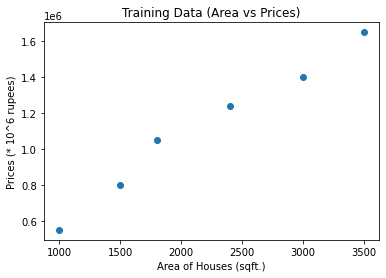

In [18]:
#3. Data visualization
import matplotlib.pyplot as plt
plt.scatter(df['Area'], df['Prices'], marker = 'o')
plt.title('Training Data (Area vs Prices)')
plt.xlabel('Area of Houses (sqft.)')
plt.ylabel('Prices (* 10^6 rupees)')

In [30]:
#4. Divide the data into input and output
#INPUT - Area (variable is x)
#OUTPUT - Price (variable is y)
#input(x) is always 2 dimensional arrays
#output(y) is always 1 dimensional array
x = df.iloc[0:6, 0:1] #slicing the area column

#can select all rows by just writing column as well.
#x = df.iloc[:, 0:1]
print(x.values) #.values converts my dataframe into 2D array.
print(x.ndim)

[[1000]
 [1500]
 [1800]
 [2400]
 [3000]
 [3500]]
2


In [33]:
#in column slicing, if there is ':', array is 2D, else 1D
y = df.iloc[:, 1] #select only index 1 column, but all rows. no ':' in col slicing, so array is 1D.
print(y.values)
print(y.ndim)

[ 550000  800000 1050000 1240000 1400000 1650000]
1


In [34]:
#5. TRAIN and TEST variables.
#no need of this cuz of limited data.

In [35]:
#6. Normalization/Scaling - To be done only for inputs, only applicable on multivariate datasets

In [36]:
#7. Run a classifier/regressor/clusterer. Here, it is a regressor
#sklearn.linear_model is a package (collection of libraries)
#LinearRegression is a library name 
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [39]:
#8. Fitting the model (Mapping/plotting the inputs with the outputs)
model.fit(x,y) #plotting the values of x and y in the LinearRegression library

LinearRegression()

In [46]:
#9. Predicting the output
y_pred = model.predict(x) #using the input values, we predict the output.
#note: y_pred is nothing but the line of best fit.
print(y_pred)
print(y)

[ 611053.81165919  821031.39013453  947017.93721973 1198991.03139013
 1450964.12556054 1660941.70403587]
0     550000
1     800000
2    1050000
3    1240000
4    1400000
5    1650000
Name: Prices, dtype: int64


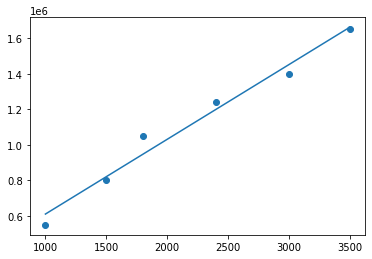

In [47]:
plt.plot(x,y_pred)
plt.scatter(x,y)

In [61]:
#conclusion: we have to compare the predicted output values (y_pred) and actual output values (y)
#so, when we compare y_pred and y, we see that there is a huge difference in the corresponding elements.
print(y - y_pred)
#this huge difference does not mean that our model has predicted wrong. it just means that our model is less 'linear'
#linearity of the model depends on the nature of the data, and size of the data.

0    -61053.811659
1    -21031.390135
2    102982.062780
3     41008.968610
4    -50964.125561
5    -10941.704036
Name: Prices, dtype: float64


In [65]:
#INDIVIDUAL PREDICTION
#want to know the price of 2000 sq. feet
print(model.predict([[2000]])) #prediction according to our model.

[1031008.96860987]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [67]:
#cross-verifying our prediction.
#y = mx+c for linear regression
#to find m,
m = model.coef_
print(m)
#to find c,
c = model.intercept_
print(c)

[419.95515695]
191098.65470852004


In [69]:
#y  = mx+c, let x be 2000 (since we want to predict for 2000)
print(2000*m+c) #same answer as predicted. so prediction is done on this basis.

[1031008.96860987]


Text(0.5, 1.0, 'Line of Best Fit')

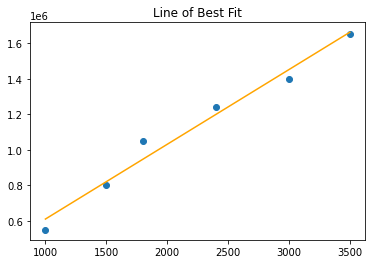

In [72]:
#visualization for the line of best fit.
plt.scatter(x,y) #actual values
plt.plot(x,y_pred, color = 'orange') #predicted values
plt.title("Line of Best Fit")
#if all points on the line, the model would've been perfectly linear. 